# Dataset 

In [202]:
# Veri seti Acıklaması
# Veri seti Adı: Hmelq bir banka verisidir. İnsanların çeşitli niteliklere göre kredilerini ödeyip ödemedigi 
# bilgilerini tutar

#*BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

#*LOAN: The amount of the loan requested( İstenen kredi miktarı) 
#(Daha az kredi talep eden adayların gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek olmalıdır)

#*MORTDUE: How much the customer needs to pay on their mortgage(Müşterinin ipotek ödemesinde ne kadar ödeme yapması gerekiyor)
#(Daha az ipoteğe sahip olan başvuru sahiplerinin gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek) 

#*VALUE: Assessed valuation (Değerlendirilen değer, geçerli vergileri ölçmek için bir mülke atanan dolar değeridir)
#(Mevcut mülkün değeri daha düşükse, gelecekteki kredilerde temerrüde düşme olasılığı daha az olmalıdır)

#*REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemekj için alınan kredi)
#(Krediyi kullanma sebebinin temerrüde düşme şansı üzerinde de etkisi olabilir)

#*JOB: Broad job category
#*YOJ: Years on the job

#*DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)
#(Aşağılayıcı raporlar kredi geçmişinde her zaman olumsuz bir işarettir ve bu sütundaki herhangi 
 #bir sayı gelecekte yüksek varsayılan temerrüt şansını göstermelidir.)
    
#*DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
#(Bir kişi geçmişte birkaç kez temerrüde düşmüş olsaydı, temerrüt şansı daha yüksek olurdu)
#(Ödenmemiş borçların sayısı)

#*CLAGE: Age of oldest trade line (oldest tradeline= credit account)
#*NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
#*CLNO: Number of trade lines

#*DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)
#(Bir kişinin gelir konusunda yüksek borcu varsa, o kişinin daha fazla borç geri ödemesi zor olacaktır, 
#bu nedenle bu rakamdaki yüksek bir rakam temerrüte düşmesi daha fazladır)

In [203]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from scipy import stats
import scipy.stats as ttest_ind
import scipy.stats as shapiro
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import warnings 
warnings.filterwarnings("ignore")

In [204]:
# Loading Data
df=pd.read_csv("hmelq.csv")
data=df.copy()
class Loading_Data:
    def __init__ (self,data):
        self.data=data
    def translate_to_dataframe(self):# dataset is converted to dataframe
        return pd.DataFrame(self.data).head()# the first 5 observations of the data set are shown
# Data Information
class Information:
    def __init__ (self,data):
        self.data=data
    def info_data(self):
        print(self.data.head())
        print(self.data.info())    
        print(self.data.dtypes)
        print(self.data.shape)
        print(self.data.columns)
    def describe_missing_values(self):
        print(self.data.isnull().values.any()) # Are there any missing observations in the dataset? If there is True; If there is no False returns
        print(self.data.isnull().sum())# Prints the number of missing observations on the basis of variables
    def select_dtypes_numeric(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])# numeric variables are selected
        print(df_numeric)
    def describe_data(self):# summary statistics information of numeric variables are accessed
        df_numeric=self.data.select_dtypes(include=['float64','int64'])# numeric variables are selected
        print(self.data.describe().T)
    def select_dtypes_category(self):
        df_category=self.data.select_dtypes(include=["object"])# categorical variables are selected
        print(df_category)
        for i in df_category.columns:
            print(self.data[i].value_counts()) # Prints the frequency information of categorical variables
    def data_cor(self):
        print(self.data.corr())

# Exploratory Data Analysis (EDA)
class Visualizer:
    def __init__(self,data):
        self.data=data
    def msno_bar(self):
        plt.figure(figsize=(6,5))
        msno_bar = msno.bar(self.data,color='lightblue')
        return msno_bar
    def heat_map(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        f,ax = plt.subplots(figsize=(200,200))
        return sns.heatmap(df_numeric.corr(), annot=True, linewidths=.8, fmt='.8f', ax=ax)
    def bar_plot(self,x=None,y=None,z = None):# Used to visualize barplot categorical variables
        plt.figure(figsize=(6,5))
        sns.barplot(x=x, y=y, hue=z, data=self.data)
    def box_plot(self,x=None,y=None,z=None): # continuous variables are visualized with the help of cartridges
        numeric_features=[x for x in data.columns if data[x].dtype!="object"]
        for i in data[numeric_features].columns:
            plt.figure(figsize=(6,5))
            plt.title(i)
            sns.boxplot(data=data[i])
    def hist_plot(self):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            plt.figure()
            plt.hist(df_numeric[i],bins=100,color="orange")
            plt.title("Histogram of "+ i)
    def dist_plot(self,x=None,y=None,z=None):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        df_numeric=df_numeric.dropna()
        for i in  df_numeric.columns:
            plt.figure()
            sns.distplot(np.array(df_numeric[i]),hist=False,kde=True,color="g")
            plt.title("Distplot  of "+ i)
    def reg_plot(self):
        plt.figure(figsize=(16, 7))
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i, column in enumerate(df_numeric.select_dtypes(exclude=['object']).columns[1:], 1):
            plt.subplot(2, 5, i)
            randNorm = np.random.normal(np.mean(df_numeric[column]), np.std(df_numeric[column]), len(df_numeric[column]))
            sns.regplot(np.sort(randNorm), np.sort(df_numeric[column]))
            plt.xlabel(f'{column}')
    def count_plot(self,x=None,y=None,z=None):
        plt.figure(figsize=(6,5))
        sns.countplot(x=x, y=y, hue=z, data=self.data)
    def correlation(self):
        fig,ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(data.corr(), ax=ax, annot=True, 
        linewidths=0.05, fmt= '.2f',cmap="Blues")
        plt.show()
    def scatter_plot(self,x=None,y=None,z=None):
        return sns.scatterplot(x=x,y=y,data=self.data)
    def lm_plot(self,x=None,y=None,z=None,w=None,r=None):
        return sns.lmplot(x=x, y=y, hue=z,col=w,row=r, data=self.data)
    def swarm_plot(self,x=None,y=None,z=None):
        return sns.swarmplot(x=x, y=y,hue=z, data=self.data)
    def line_plot(self,x=None,y=None,z=None):
        return sns.lineplot(x=x,y=y,hue=z,data=self.data)
    def pair_plot(self,x=None,y=None,z=None,w=None):
        return sns.pairplot(self.data,hue=z)
    def cross_tab(self,x=None,y=None,n=None):
        numeric_features=[x for x in data.columns if data[x].dtype!="object"]
        for i in numeric_features.columns:
            return pd.crosstab(self.data[i],self.data[i],normalize=n).style.background_gradient(cmap="summer_r")
        
# Performing Hypothesis Testing
class HypothesisTesting:
    def __init__(self,data):
        self.data=data
    def normality_assumption(self):# normality assumption is realized by shapiro wilks test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
                df_new = df_numeric.dropna(subset=[i])
                stat, p = stats.shapiro(df_new[i])
                print("Statistics:%3.3f, p=%.3f " % (stat,p))
                alpha = 0.05
                if p>alpha:
                    print(i," için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
                else:
                    print(i," için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")
        print("*****************************************************************************************")
    def assumption_of_variance_homogeneity(self,variable=None,x=None,y=None):#assumption of variance homogeneity is realized by levene test
        grps=pd.unique(data[variable].values)
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            for j in grps:
                df_new = data.dropna(subset=[i])
                stat, p = stats.levene(df_new[i][data[variable]==x],df_new[i][data[variable]==y])
                print("Statistics:%3.3f, p=%.3f " % (stat,p))
                alpha = 0.05
                if p>alpha:
                    print(i,j," için varyans homojendir. (Fail to Reject H0)")
                else:
                    print(i,j," için varyans homojen degildir. (reject H0)")
        print("*****************************************************************************************")
    # numeri amaç değişkeni - kategorik bagımsız değişken 2 sınıflı : paired t test
    # numeri amaç değişkeni - kategorik bagımsız değişken 2 den fazla sınıflı : anova
    def two_independent_samples_t_test(self,variable=None,x=None,y=None):
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            df_new= self.data.dropna(subset=[i])
            A=df_new[df_new[variable]==x][i]
            B=df_new[df_new[variable]==y][i]
            t, p = stats.ttest_ind(A, B, equal_var=False)
            print("ttest_ind: i=%s t = %g  p = %g" % (i,t, p))
            alpha = 0.05
            if p>alpha:
                print(i,"ile", variable," değişkeni arasında istatistiksel olarak anlamlı bir fark vardır.(Fail to Reject H0)")
            else:
                print(i," ile ", variable," değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur.(reject H0)")
        print("*****************************************************************************************")
    # kategorik amaç değişkeni- kategorik bağımsız değişken : ki- kare bağımsızlık testi(chi-square)
    def chi_square_t_test(self,x=None,y=None):
        data_cross_tab=pd.crosstab(index=data[x],columns=data[y])
        chi2,p,dof,expected=stats.chi2_contingency(data_cross_tab)
        results=[["Item","Value"],
                 ["Chi-Square Test",chi2],
                 ["p - value",p]]
        print("Chi-Square Test =%g p=%g" %(chi2,p))
        alpha = 0.05
        if p>alpha:
            print(x,"ve",y," degiskenleri birbirinden bağımsızdır.(Fail to Reject H0)")
        else:
            print(x,"ve",y," degiskenleri birbirinden bağımsız değildir(reject H0)")
        print("*****************************************************************************************")
    def spearmanr_test(self,x=None):#  Korelasyon Anlamlılığı Testi için Spearman Testini kullanıcaz.---nonparametrik bir test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            test_istatistigi,pvalue=stats.spearmanr(self.data[x],self.data[i])
            print('Korelasyon Katsayısı= %.4f, p- degeri=%.4f' % (test_istatistigi,pvalue))
            alpha=0.05
            if pvalue >alpha:
                print('Degiskenler arasında anlamlı bir fark yoktur, (Fail to reject)')
            else:
                print('Degiskenler arasında anlamlı bir fark vardır, (Reject)')
        print("*****************************************************************************************")

    #numeric amaç değişkeni- numeric bağımsız değişken : korelasyon analizi ve ilgili anlamlılık testi
    def pearsonr_test(self,x=None):#Korelasyon analizini pearsonr ile de gerçekleştirdim--parametrik test
        df_numeric=self.data.select_dtypes(include=['float64','int64'])
        for i in df_numeric.columns:
            test_istatistigi,pvalue=pearsonr(self.data[x],self.data[i])
            print('Korelasyon Katsayısı= %.4f, p- degeri=%.4f' % (test_istatistigi,pvalue))
            alpha=0.05
            if pvalue >alpha:
                print('Degiskenler arasında anlamlı bir fark yoktur, (Fail to reject)')
            else:
                print('Degiiskenler arasında anlamlı bir fark vardır, (Reject)')
        print("*****************************************************************************************")
# Data Preprocessing
class PreprocessStrategy:
    def __init__(self,data):
        self.data=data
    def fill_missing_value(self):
        data=self.data.dropna()
        return data.head()
    def replace_nan(self,x=None):
        return self.data.replace(x,np.nan,inplace=True)
    def fill_missing_specific_variable_with_median(self,X=None):#filling missing observations specific to the variable
        return self.data[X].fillna(self.data[X].median(),inplace=True)
    def fill_missing_value_with_mean(self):#fill in missing values in all variables with mean
        return self.data.apply(lambda x: x.fillna(x.mean()),axis=0)
    def fill_missing_value_with_median(self):#fill in missing values in all variables with median
        return self.data.apply(lambda x: x.fillna(x.median()),axis=0)
    def normalization(self):# converts variable values from 0 to 1
        return preprocessing.normalize(self.data)
    def one_hot_dummy_variable(self,variable=None):#It can be used to convert categorical variable to continuous variable. As a result, awareness among classes will be preserved.
        df_one_hot=self.data.copy()
        return pd.get_dummies(df_one_hot,columns=[variable],prefix=[variable]).head()
    def label_encoder(self,new_variable_name=None,categorical_variable_to_converted=None):# Performs conversions by the number of classes available
        lbe=preprocessing.LabelEncoder()
        data[new_variable_name]=lbe.fit_transform(data[categorical_variable_to_converted])
        return data[new_variable_name]
    def standardization(self):#a standardization is performed with an average of 0 standard deviations of one
        df_standardization=preprocessing.scale(self.data)
        return df_standardization
    def min_max_transformation(self,x=None,y=None):#Used to convert the values of a variable between two ranges that we want
        scaler=preprocessing.MinMaxScaler(feature_range=(x,y))
        return scaler.fit_transform(self.data)
    def binarize_transformation(self,threshold=None):#Converts the variable's values to 0 or 1 according to a certain threshold value
        binarizer=preprocessing.Binarizer(threshold=threshold).fit(self.data)
        return binarizer.transform(self.data)
        
        
# Data Modelling ,Performance/Evaluation metrics of the models
class GridSearchHelper():# model fit, model predict and model results are performed in this section
    def __init__(self,data):
        self.data=data
    def dataset_split(self,X_train=None,X_test=None,y_train=None,y_test=None):
        X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)
        return X_train,X_test,y_train,y_test
    def linear_regresyon(self,X_train=None,X_test=None,y_test=None,y_train=None):
        #X= df[[x]]# x independent variable
        #y=df[[y]] # y dependent variable 
        lm=LinearRegression()
        model=lm.fit(X_train,y_train)# model object created
        return model
    def pca(self,X_train=None,X_test=None,y_test=None,y_train=None):
        pca =PCA()
        X_reduced_test= pca.fit_transform(scale(X_test))
        print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:5])
        lm=LinearRegression()
        y_train=y_train.fillna(y_train.mean())
        model=lm.fit(X_reduced_test,y_train)
        return model
    def logistic_regresyon(self,X_train=None,X_test=None,y_test=None,y_train=None,solver=None):
        loj=LogisticRegression(solver=solver)
        model=loj.fit(X_train,y_train)
        return model
    def fit_predict(self,X_test=None):
        y_pred=model.predict(X_test)
        print(y_pred)
    def show_evaluation_metrics_and_result_regression_model(self,X_test=None,y_test=None):
        print(model.intercept_)
        print(model.coef_)
        print(r2_score(y_test,y_pred))
        print(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))#test error on the model
        print(np.sqrt(- cross_val_score(model,
                X_test,
                y_test,
                cv=10,
                scoring="neg_mean_squared_error")).mean())
    def show_evaluation_metrics_and_result_classification_model(self,X_test=None,y_test=None):
        print(accuracy_score(y_test,y_pred))
        print(cross_val_score(loj_model,X_test,y_test,cv=10).mean())
        print(classification_report(y_test,y_pred))
    def roc_curve(self,X_test=None,y_test=None):
        logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
        fpr,tpr,threshold=roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
        plt.figure()
        plt.plot(fpr,tpr,label='AUC( area =%0.2f)' % logit_roc_auc)
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.05])
        plt.xlabel('False Positive Oranı')
        plt.ylabel('True Positive Oranı')
        plt.title('ROC')
        plt.show()
    def visualization_residual(self,model=None):
        return plt.plot(model.resid)


###################  Data Loading is  Done        ##################
...................  Data Information is  Loading ..................
   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null floa

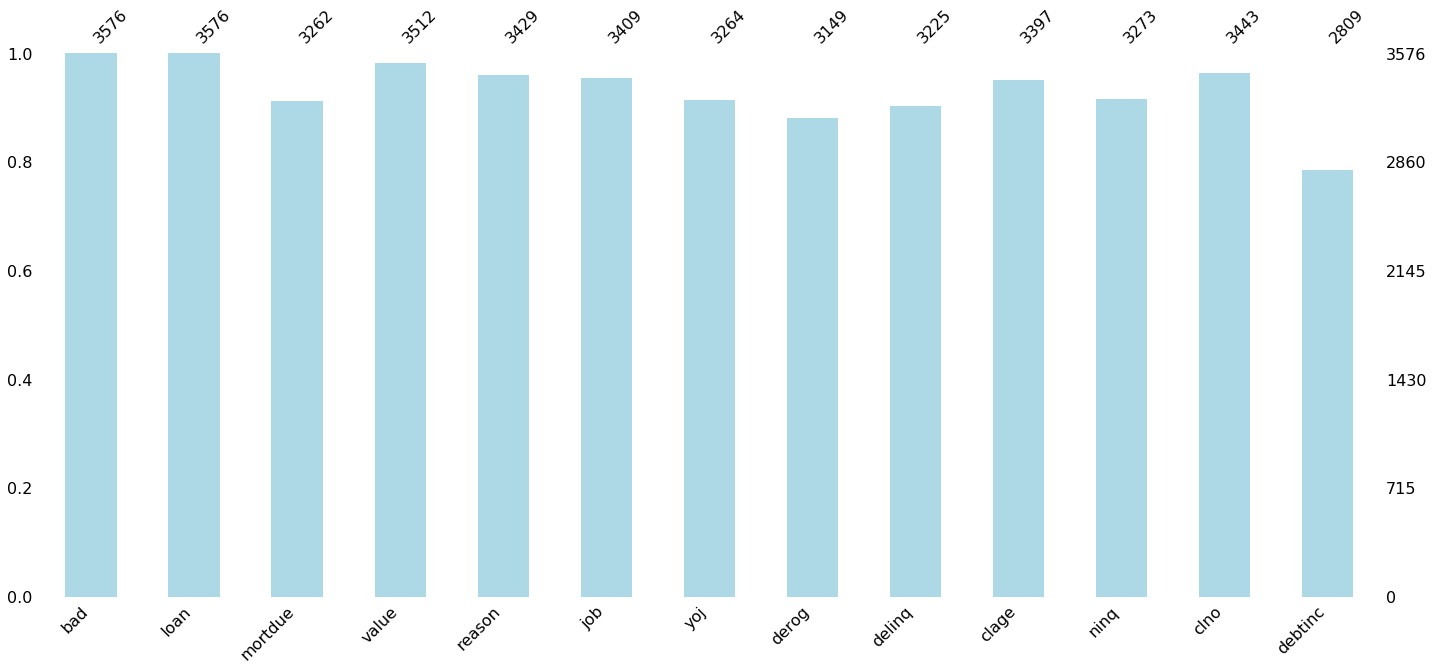

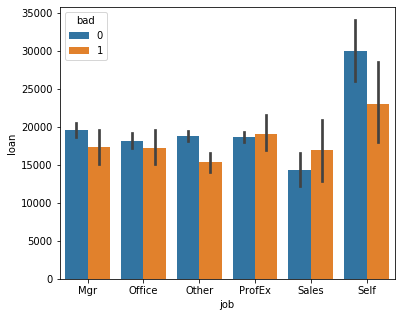

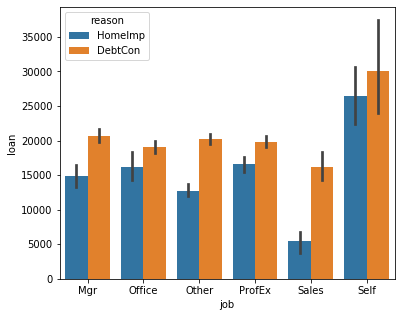

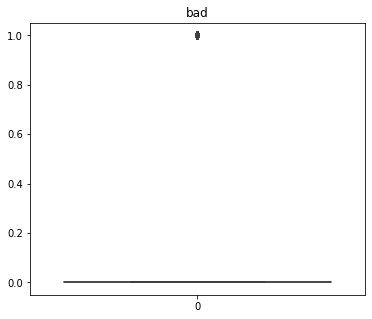

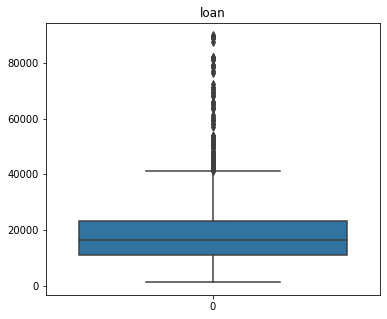

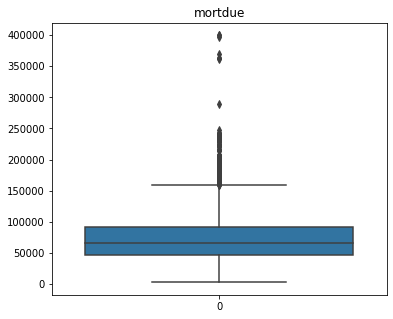

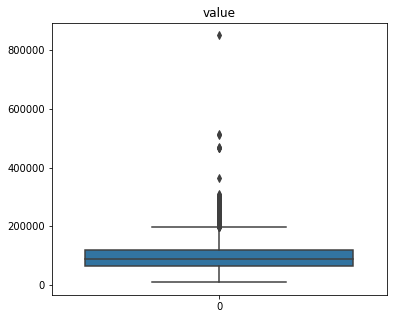

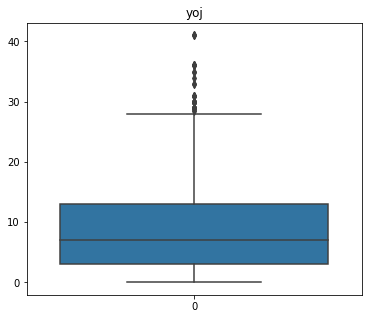

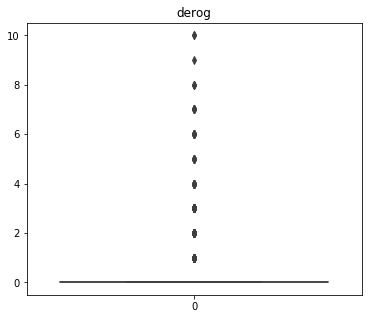

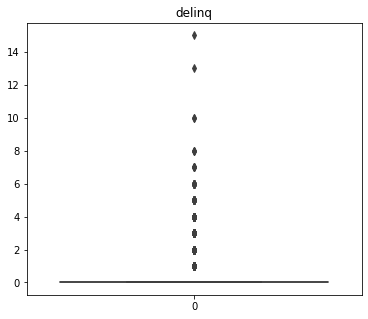

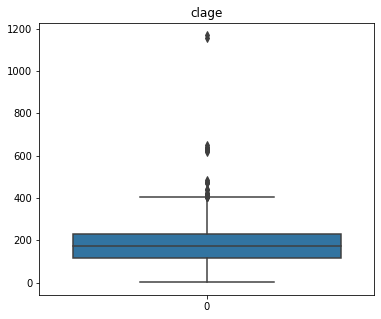

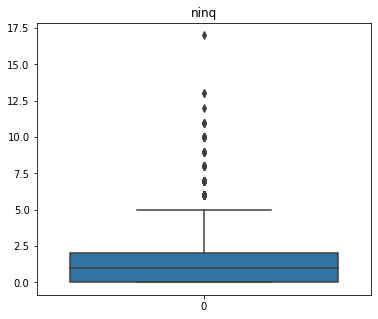

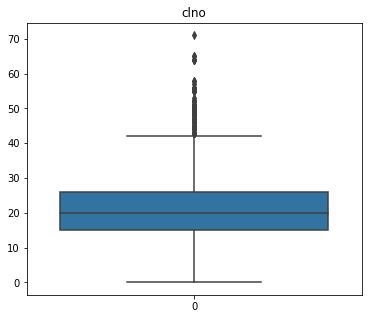

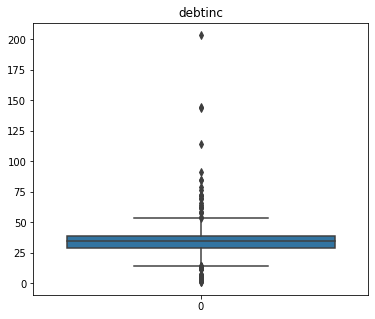

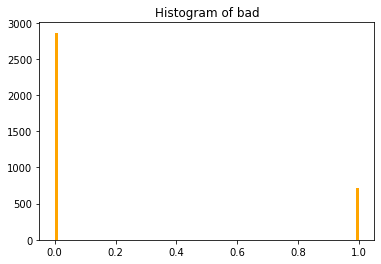

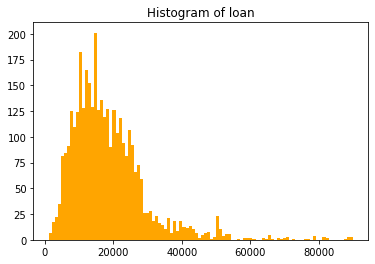

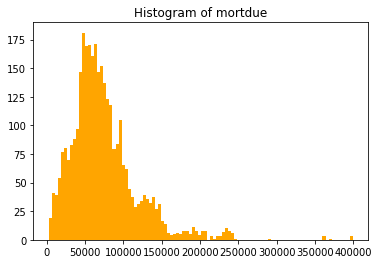

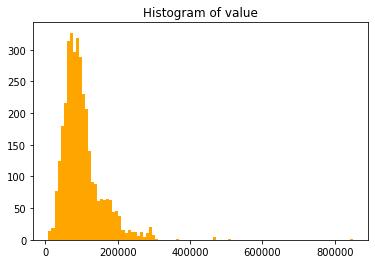

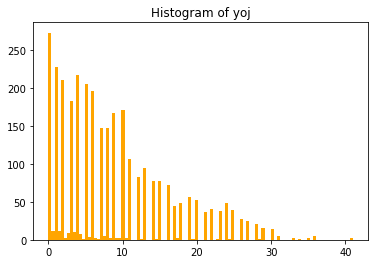

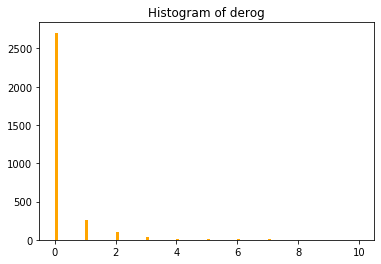

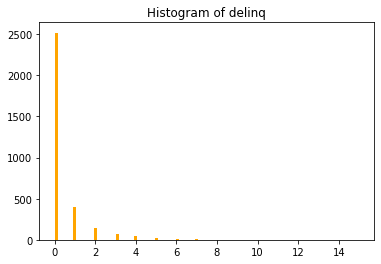

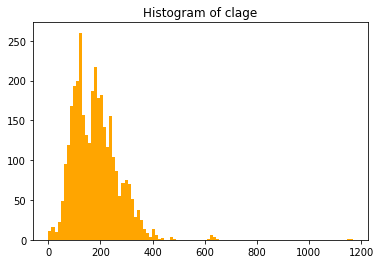

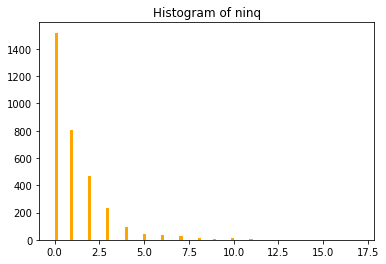

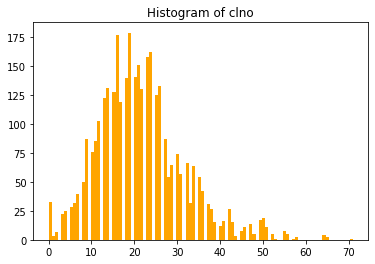

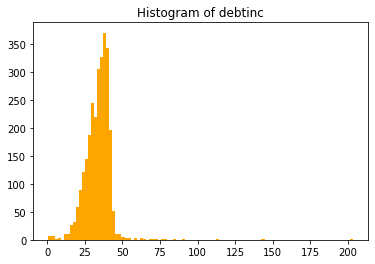

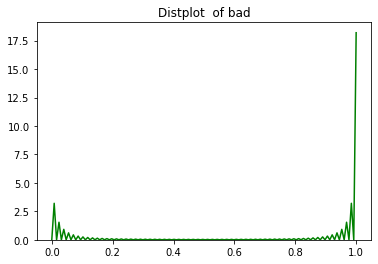

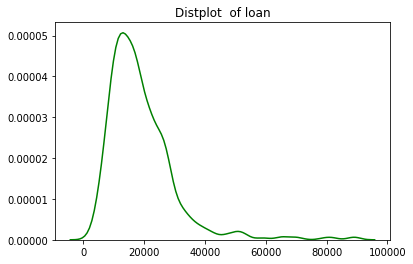

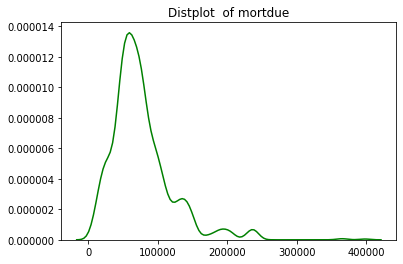

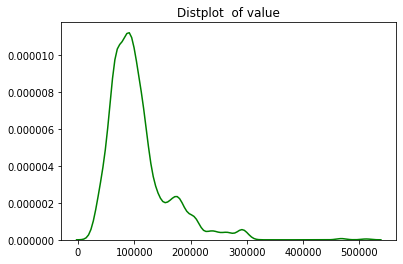

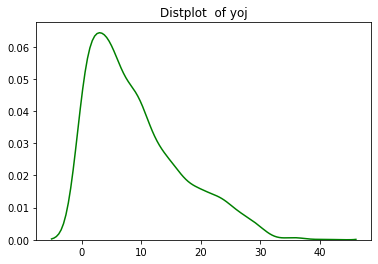

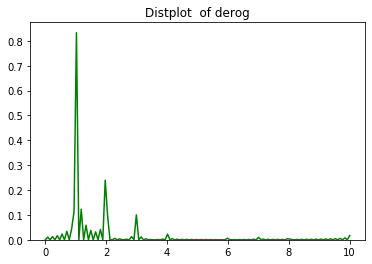

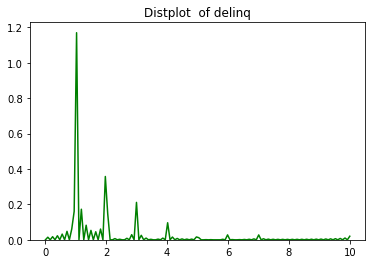

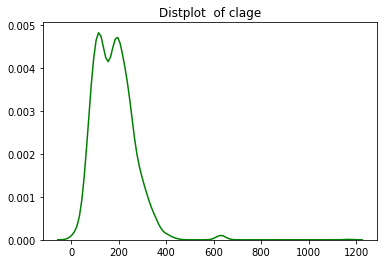

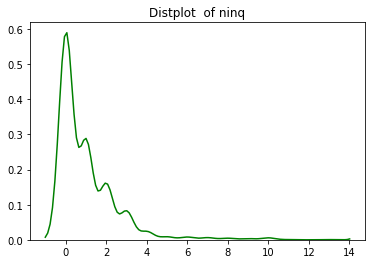

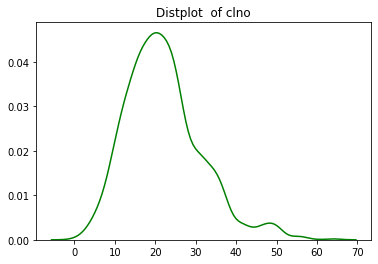

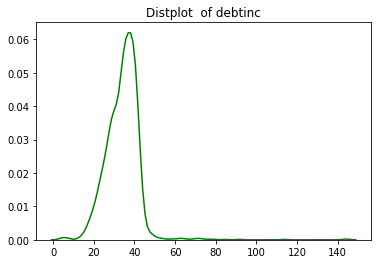

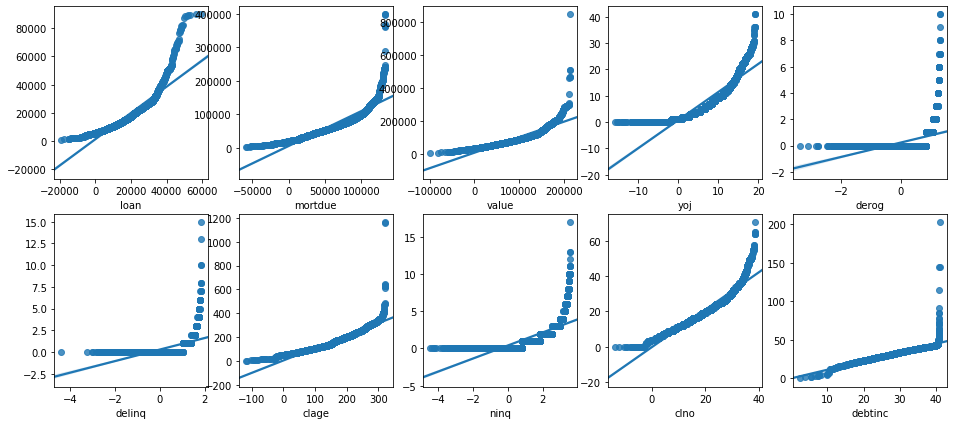

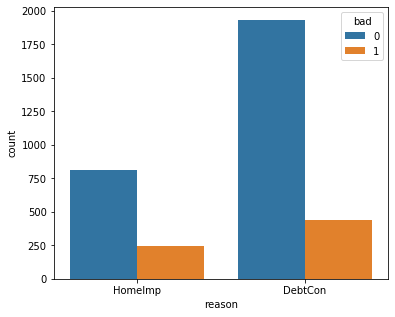

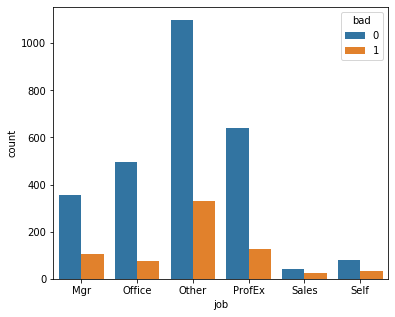

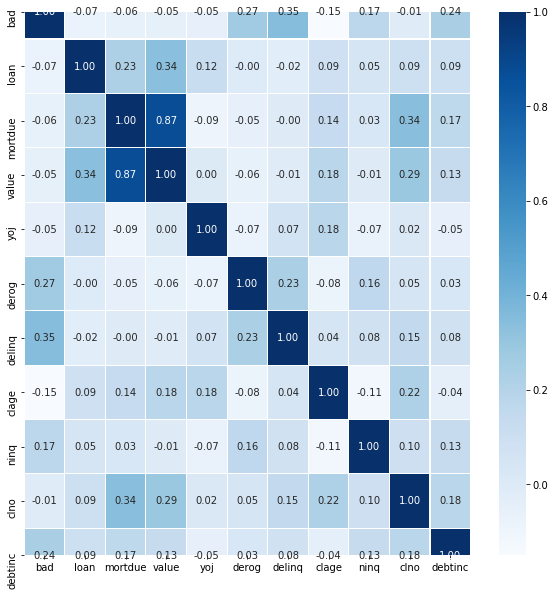

##################   Data Visualization is  Done     #####################
..................   Hypothesis Testing is  Loading  .....................
Statistics:0.489, p=0.000 
bad  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.849, p=0.000 
loan  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.882, p=0.000 
mortdue  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.848, p=0.000 
value  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.904, p=0.000 
yoj  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.338, p=0.000 
derog  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.450, p=0.000 
delinq  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.920, p=0.000 
clage  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.691, p=0.000 
n

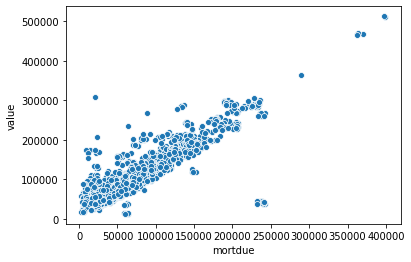

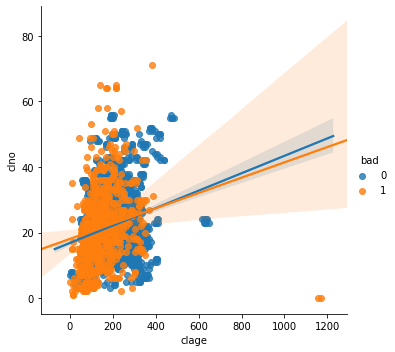

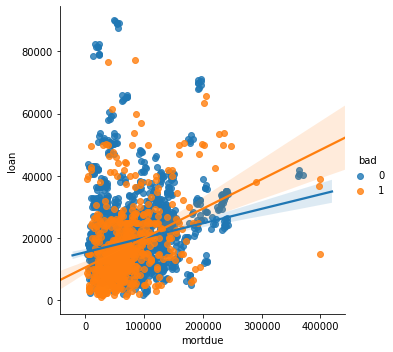

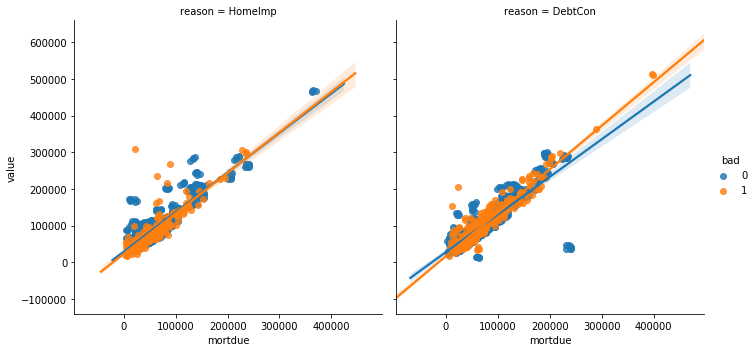

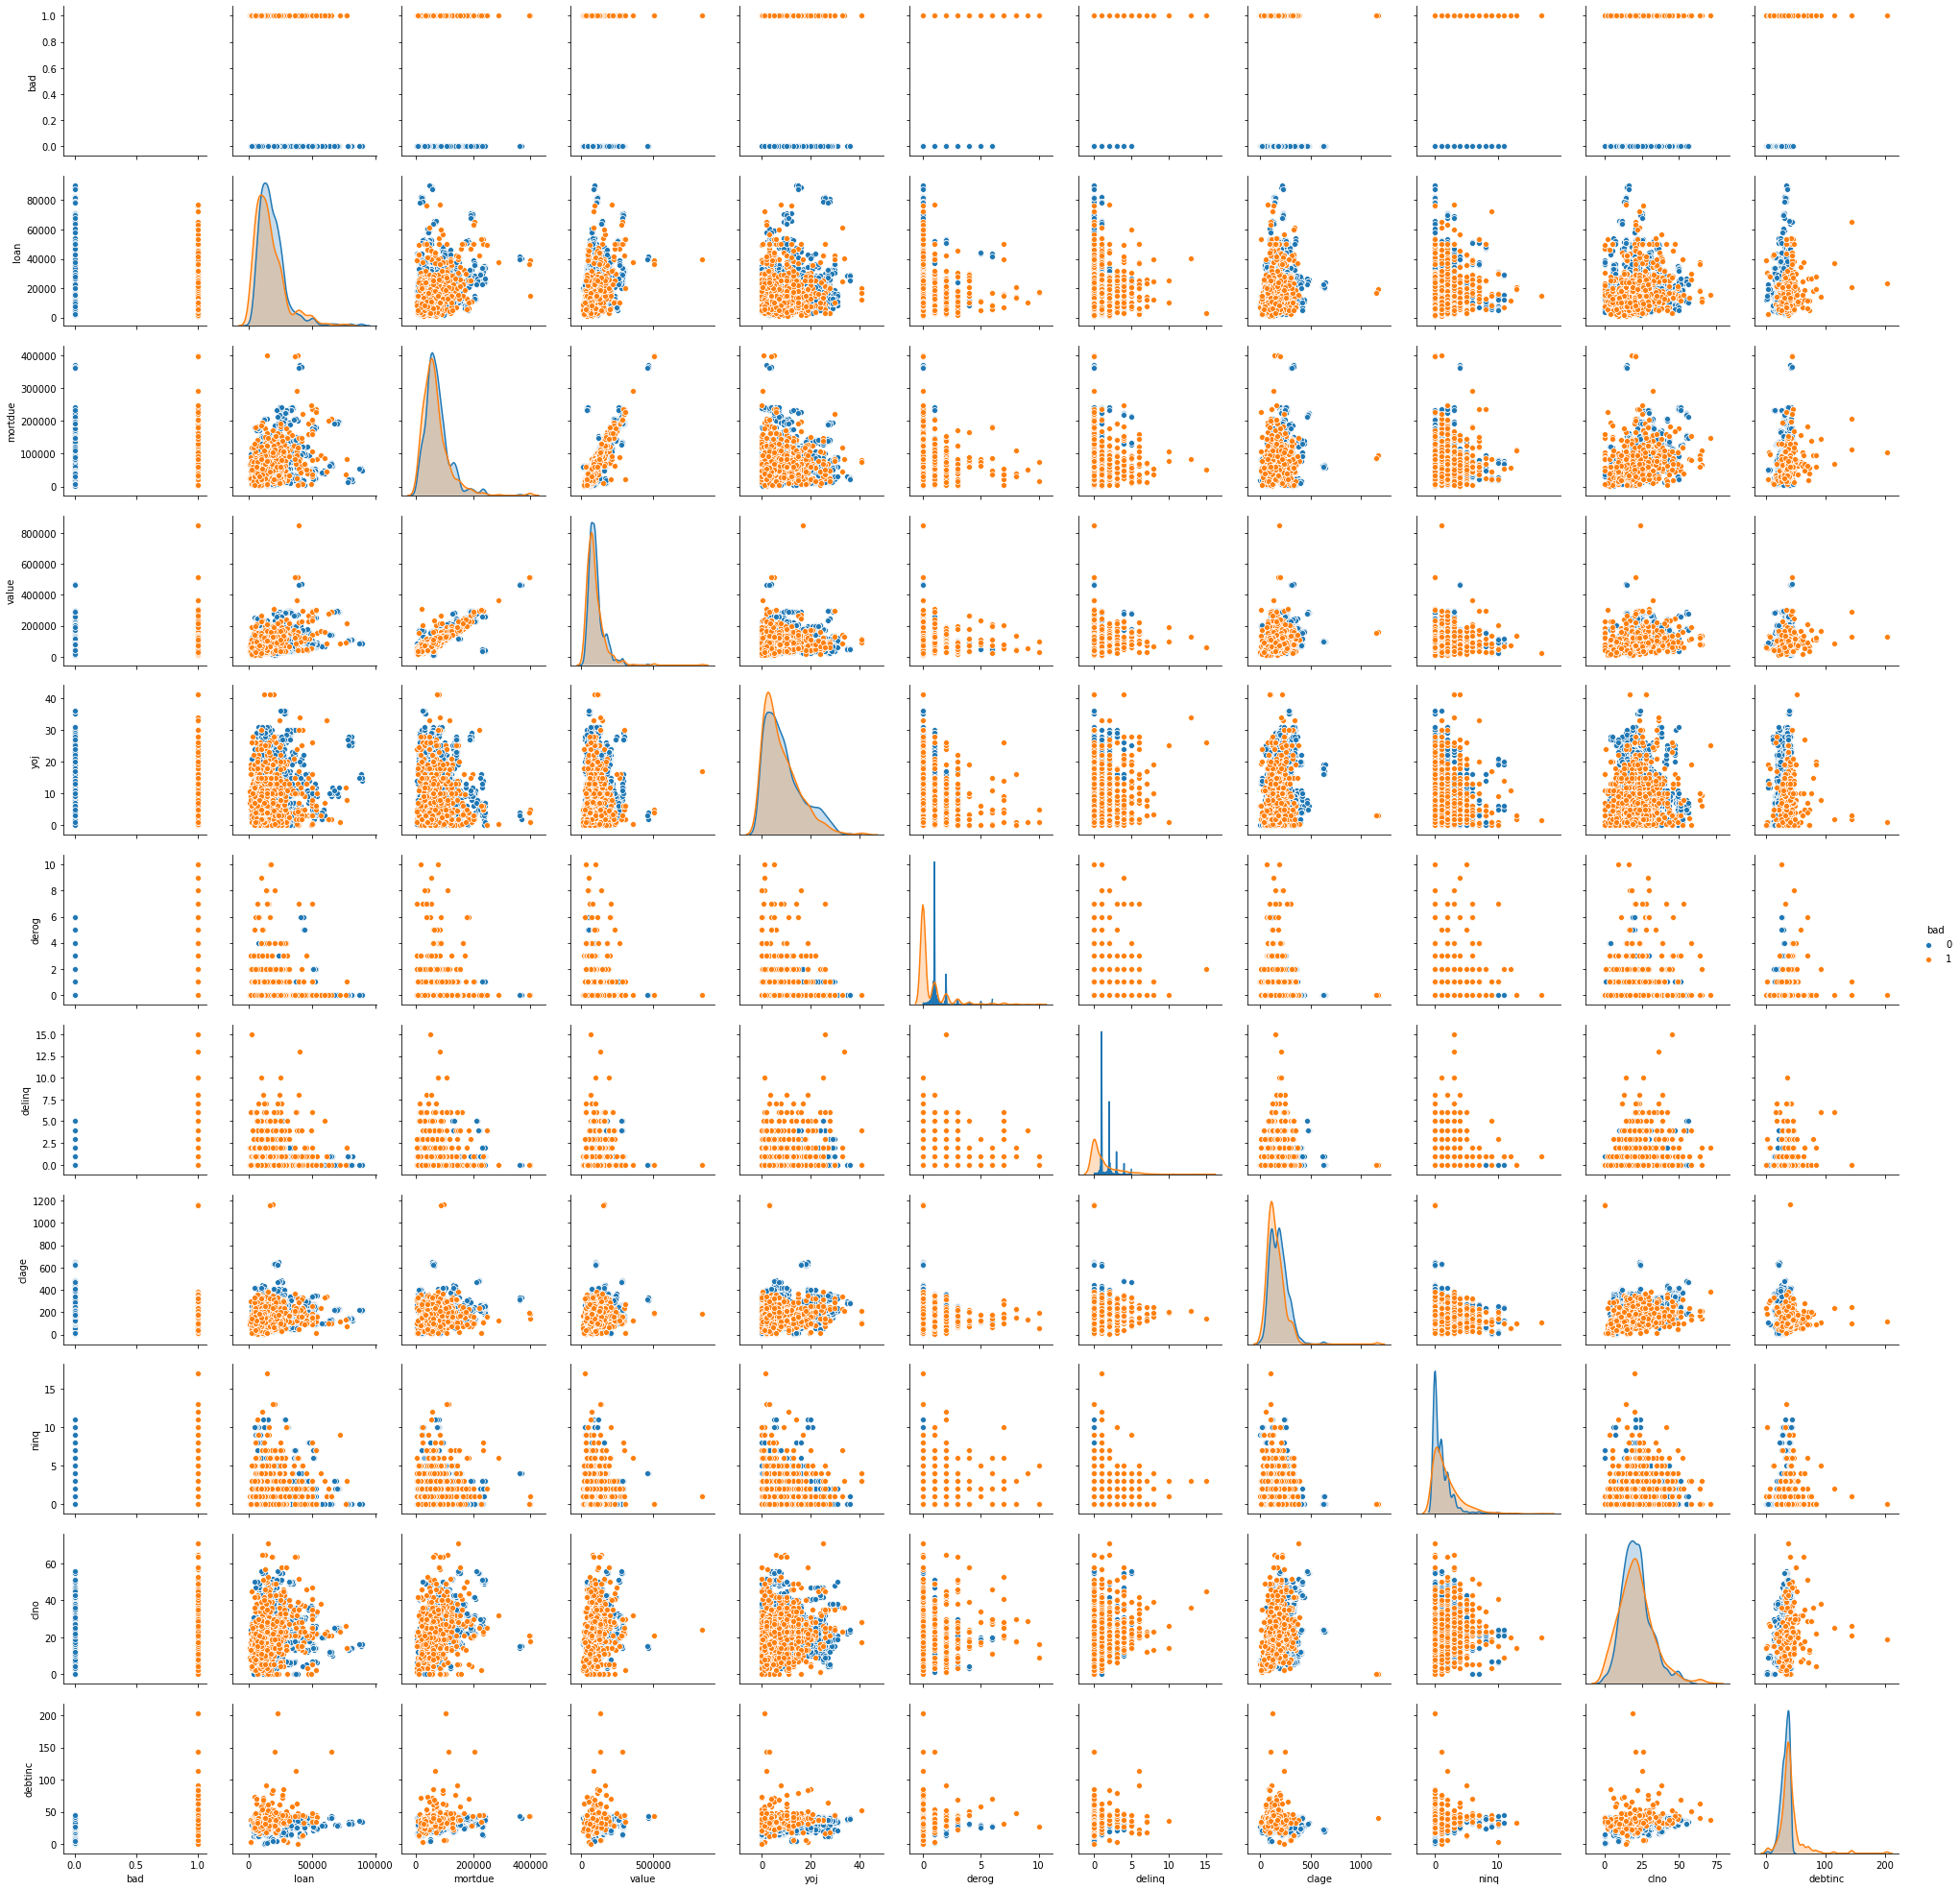

In [205]:
# Classes tested with bank data (hmelq.csv)
data=pd.read_csv("hmelq.csv")
loading_result=Loading_Data(data)
loading_result.translate_to_dataframe()
print("###################  Data Loading is  Done        ##################")
print("...................  Data Information is  Loading ..................")
data_information=Information(data)
data_information.info_data()
data_information.describe_missing_values()
data_information.select_dtypes_numeric()
data_information.describe_data()
data_information.select_dtypes_category()
print("###################  Data Information is  Done       ###################")
print("...................  Data Visualization is  Loading ....................")
data_visualization=Visualizer(data)
data_visualization.msno_bar()
data_visualization.bar_plot(x="job",y="loan",z="bad")
data_visualization.bar_plot(x="job",y="loan",z="reason")
data_visualization.box_plot()
data_visualization.hist_plot()
data_visualization.dist_plot()
data_visualization.reg_plot()
data_visualization.count_plot(x="reason",z="bad")
data_visualization.count_plot(x="job",z="bad")
data_visualization.correlation()
data_visualization.scatter_plot(x="mortdue",y="value")
data_visualization.lm_plot(x="clage", y="clno", z="bad")
data_visualization.lm_plot(x="mortdue", y="loan", z="bad")
data_visualization.lm_plot(x="mortdue", y="value", z="bad",w= "reason")
#data_visualization.cross_tab(x="bad",y="reason",n="columns")
#data_visualization.swarm_plot(x="reason", y="debtinc",z="bad")
#data_visualization.swarm_plot(x="job", y="debtinc",z="bad")
#data_visualization.line_plot(x="loan",y="value")
data_visualization.pair_plot(z="bad")
print("##################   Data Visualization is  Done     #####################")
print("..................   Hypothesis Testing is  Loading  .....................")
hypothesis_testing=HypothesisTesting(data)
hypothesis_testing.normality_assumption()
hypothesis_testing.assumption_of_variance_homogeneity(variable="bad",x=1,y=0)
hypothesis_testing.two_independent_samples_t_test(variable="bad",x=1,y=0)
hypothesis_testing.chi_square_t_test(x="bad",y="job")
print("##################  Hypothesis Testing is  Done      ####################")

# Model Kurma

In [206]:
data=pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


## Logistic Regression

In [207]:
dms = pd.get_dummies(df[['reason', 'job']])
dms.head()


,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [208]:
X_ = df.drop(['bad', 'reason', 'job'],axis=1)
y = df["bad"]
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [209]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1816, 16)
(1816,)
(202, 16)
(202,)


In [210]:
# stats model ile modelleme
loj = sm.Logit(y_train, X_train)
loj_model = loj.fit()
loj_model.summary()
# p değerinin 0.05 den küçük olan değerler bizim için y yi aciklama da anlam ifade etmektedir.

Optimization terminated successfully.
         Current function value: 0.257608
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1816
Model:                          Logit   Df Residuals:                     1800
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1359
Time:                        16:11:58   Log-Likelihood:                -467.82
converged:                       True   LL-Null:                       -541.41
Covariance Type:            nonrobust   LLR p-value:                 8.723e-24
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.78e-05   1.07e-05     -1.664      0.096   -3.88e-05    3.17e-06
mortdue         1.015e-06   4.88e-06      0.208      0.835   -8.56e-06    1.06e-05
value          -1.901e-06   4.07e-06     -0.467      0.641   -9.89e-06    6.09e-06
yoj               -0.0364      0.014     -2.673      0.008      -0.063      -0.010
derog              0.5516      0.128      4.294      0.000       0.300       0.803
delinq             0.7548      0.094      8.063      0.000       0.571       0.938
clage             -0.0085      0.001     -6.103      0.000      -0.011      -0.006
ninq               0.0309      0.049      0.627      0.531      -0.066       0.128
clno              -0.0402      0.011     -3.543      0.000      -0.062      -0.018
debtinc            0.0196      0.007      2.703      0.007       0.005       0.034
reason_DebtCon    -0.4788      0.184     -2.596      0.009      -0.840      -0.117
job_Mgr           -0.1503      0.268     -0.560      0.575      -0.676       0.376
job_Office        -0.7316      0.290     -2.521      0.012      -1.300      -0.163
job_ProfEx        -0.2778      0.254     -1.092      0.275      -0.777       0.221
job_Sales          0.8605      0.600      1.434      0.152      -0.315       2.036
job_Self           0.9308      0.523      1.780      0.075      -0.094       1.955
==================================================================================
"""

In [211]:
#  anlamsız değişkenlerin modelden atılması gerekmektedir.
X_train = X_train[loj_model.pvalues[loj_model.pvalues <  0.05].index]
X_test=X_test[loj_model.pvalues[loj_model.pvalues <  0.05].index]

In [212]:
# Modelin kurulması
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
print(loj_model.intercept_)# sabit katsayı
print(loj_model.coef_)# katsayılar

[-4.12192771]
[[-0.02066605  0.61845703  0.7438842  -0.00506898 -0.02955579  0.08694976
  -0.05256178 -0.60899594]]


In [214]:
# Modelin test verileriyle tahmin edilmesi
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = loj_model.predict(X_test)


In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [216]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9108771929824563

In [217]:
y_pred = loj_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Counfusion matrix: \n",confusion_matrix)
print("Accuracy: ",accuracy)

Counfusion matrix: 
 [[183   1]
 [ 16   2]]
Accuracy:  0.9158415841584159


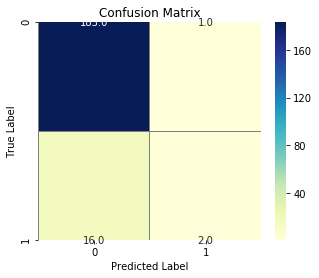

In [152]:
y_pred = loj_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [179]:
loj_model.predict(X_test)[0:10]# X verileri ile tahmin etme işlemi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [180]:
loj_model.predict_proba(X_test)[0:10]
# 0 olma ve 1 olma ihtimallerini(olasılıgını) veriyor
#sağ 1 olma ihtimali 
#sol  ise 0 olma ihtimalidir
# threshold=0.5 için ayarlanmıştır

array([[0.92631991, 0.07368009],
       [0.94924246, 0.05075754],
       [0.98269115, 0.01730885],
       [0.98596492, 0.01403508],
       [0.94422742, 0.05577258],
       [0.95968958, 0.04031042],
       [0.90877545, 0.09122455],
       [0.9564823 , 0.0435177 ],
       [0.97748731, 0.02251269],
       [0.9681213 , 0.0318787 ]])

In [181]:
y[0:10]# gerçek y değerleri

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [182]:
# gerçek y değerlerim ile yukarıdaki tahmin değerleri  ile kıyaslamak için;
y_probs = loj_model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_probs[0:10]
# değerlerin 1 olma olasılıkları

array([0.07368009, 0.05075754, 0.01730885, 0.01403508, 0.05577258,
       0.04031042, 0.09122455, 0.0435177 , 0.02251269, 0.0318787 ])

In [183]:
# threshold değerini değiştirerek tahmini gerçekleştirebiliriz
y_pred = [1 if i > 0.6 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [184]:
accuracy_score(y_test,y_pred)# dogru yaptıgımız isler/ tüm isler

0.9158415841584159

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [186]:
#roc curve ün 1e yakın olmasını gerekiyor.
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
logit_roc_auc

0.5528381642512077

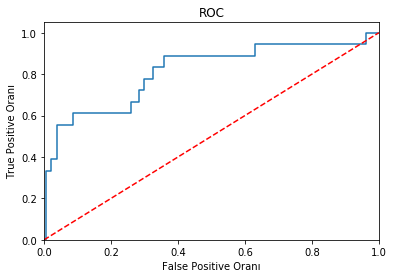

In [187]:
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
fpr,tpr,threshold=roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC( area =%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [80]:
## iyi model kurduğumuzda mavinin altında kalan alanın 1 olması beklenir
# roc curve grafiğinde başlarda pik yapıp daha sonra sabilenip converge etmesi beklenir